In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('/content/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


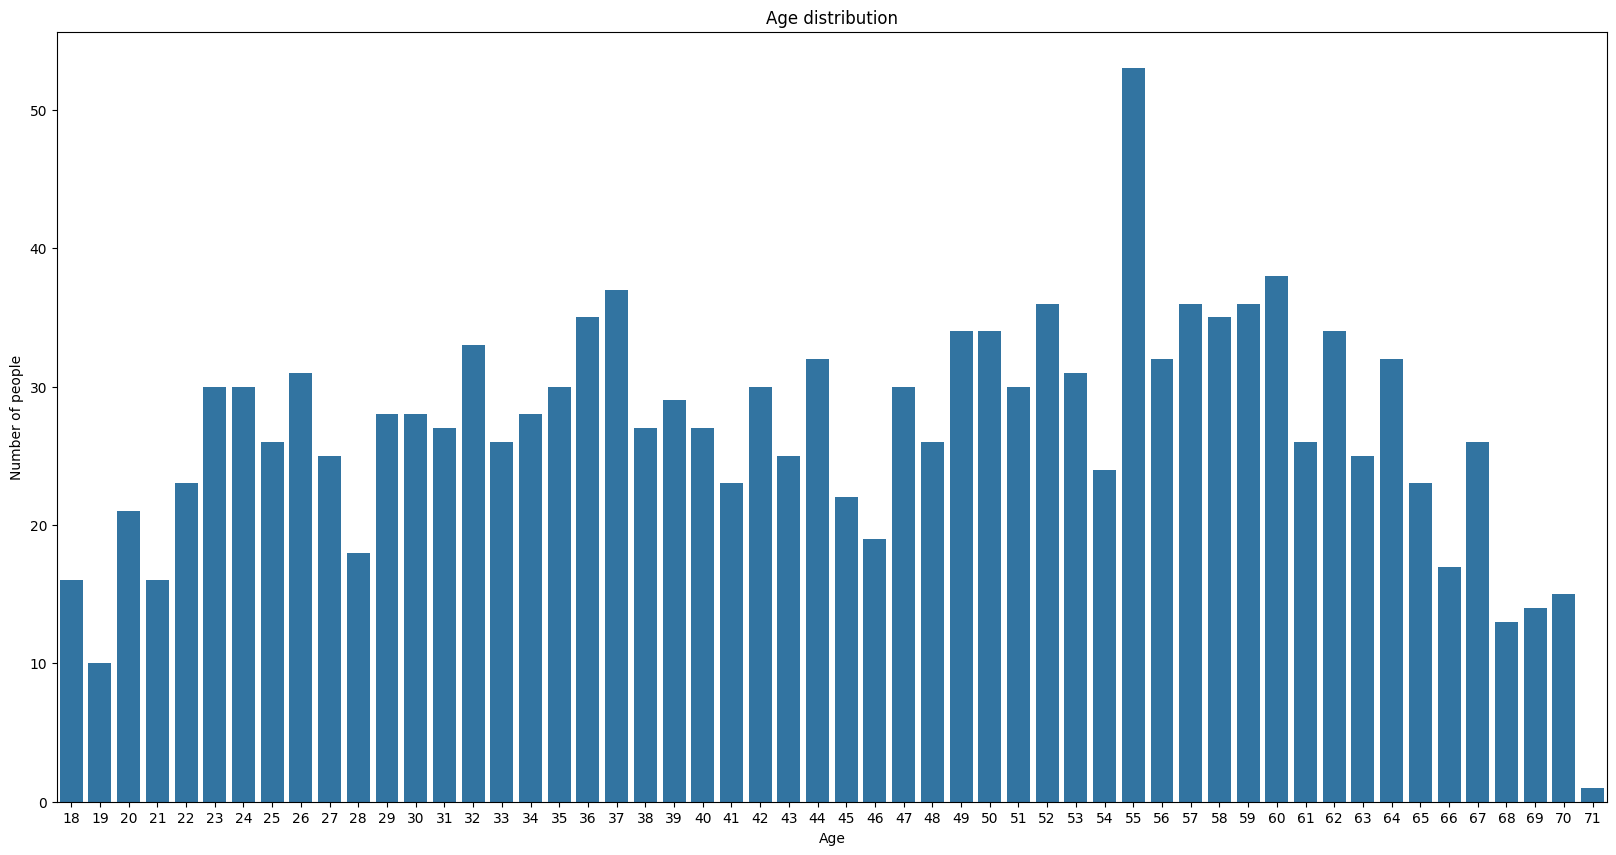

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age distribution')
plt.show()

In [7]:
to_drop=df.columns[11:] #dropped columns will be used as profilers
df_tocluster=df.drop(to_drop,axis=1)
df_tocluster.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [8]:
le=LabelEncoder()
label=df_tocluster.columns[:11]
for col in label:
  df_tocluster[col]=le.fit_transform(df_tocluster[col])
df_tocluster.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [9]:
#Here Standard Scaler is not needed since we are considering only categorical variables in the clustring process

Text(0.5, 1.0, 'Elbow Method')

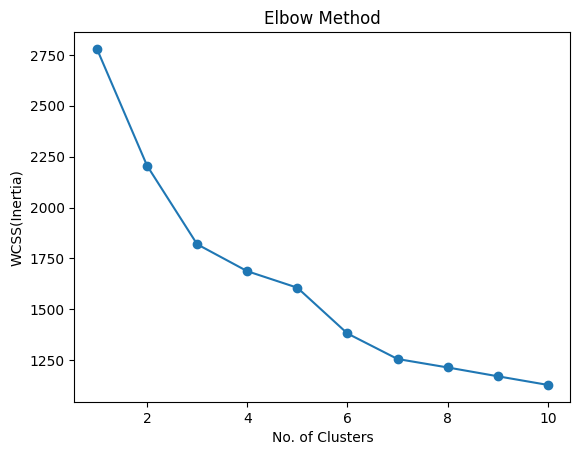

In [10]:
#elbow method for finding optimum no. of clusters
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df_tocluster)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS(Inertia)')
plt.title('Elbow Method')

In [11]:
from sklearn.metrics import silhouette_score
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  labels=kmeans.fit_predict(df_tocluster)
  score=silhouette_score(df_tocluster,labels)
  print(f'Silhouette score for K= {k} : {score:.3f}')

Silhouette score for K= 2 : 0.231
Silhouette score for K= 3 : 0.236
Silhouette score for K= 4 : 0.229
Silhouette score for K= 5 : 0.227
Silhouette score for K= 6 : 0.262
Silhouette score for K= 7 : 0.277
Silhouette score for K= 8 : 0.287
Silhouette score for K= 9 : 0.279
Silhouette score for K= 10 : 0.292


In [12]:
kmeans=KMeans(n_clusters=4, random_state=42) #selecting 4 clusters and clustering
df['Cluster']= kmeans.fit_predict(df_tocluster)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female,1
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female,2
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male,2
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female,1
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female,0
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male,1


In [13]:
df['Cluster']= kmeans.labels_

In [14]:
df.groupby('Cluster')['Age'].mean()

,Age
Cluster,
0,43.949239
1,43.164725
2,43.585507
3,48.948387


In [15]:
df.groupby('Cluster')[['Gender']].value_counts(normalize=True)

Cluster  Gender
0        Male      0.507614
         Female    0.492386
1        Female    0.594010
         Male      0.405990
2        Male      0.547826
         Female    0.452174
3        Female    0.574194
         Male      0.425806
Name: proportion, dtype: float64

In [16]:
df.groupby('Cluster')['VisitFrequency'].value_counts(normalize=True)

Cluster  VisitFrequency       
0        Once a month             0.446701
         Every three months       0.233503
         Once a week              0.192893
         Once a year              0.071066
         More than once a week    0.050761
         Never                    0.005076
1        Once a month             0.389351
         Once a week              0.227953
         Every three months       0.212978
         Once a year              0.094842
         More than once a week    0.058236
         Never                    0.016639
2        Every three months       0.266667
         Once a month             0.234783
         Once a year              0.220290
         Never                    0.147826
         Once a week              0.107246
         More than once a week    0.023188
3        Once a year              0.338710
         Every three months       0.245161
         Never                    0.222581
         Once a month             0.116129
         Once a week              0.074194
         More than once a week    0.003226
Name: proportion, dtype: float64

In [17]:
df.groupby('Cluster')['Like'].value_counts(normalize=True)

Cluster  Like        
0        3               0.223350
         2               0.192893
         4               0.192893
         I love it!+5    0.152284
         1               0.116751
         0               0.065990
         -1              0.020305
         -2              0.020305
         -3              0.010152
         -4              0.005076
1        3               0.224626
         4               0.179700
         I love it!+5    0.168053
         2               0.158070
         1               0.119800
         0               0.086522
         -1              0.024958
         -2              0.014975
         -3              0.008319
         -4              0.008319
         I hate it!-5    0.006656
2        I hate it!-5    0.220290
         0               0.165217
         3               0.110145
         1               0.098551
         -3              0.078261
         2               0.078261
         -4              0.075362
         -2              0.052174
         -1              0.049275
         4               0.037681
         I love it!+5    0.034783
3        I hate it!-5    0.232258
         0               0.151613
         -3              0.125806
         -4              0.125806
         -2              0.090323
         2               0.087097
         1               0.074194
         -1              0.070968
         3               0.038710
         4               0.003226
Name: proportion, dtype: float64

In [18]:
#CLUSTER 0: People with generally positive opinion visting once in a while
#CLUSTER 1: Majority women who eat every once in a while and like it
#CLUSTER 2: People who rarely eat at McD with not very good opinion
#CLUSTER 3: Women who rarely eat at McD with mostly negative opinion

In [19]:
features= ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
X=df_tocluster[features]

#apply PCA
pca=PCA(n_components=2)
pca_result= pca.fit_transform(X)
df['PCA1']=pca_result[:,0]
df['PCA2']=pca_result[:,1]

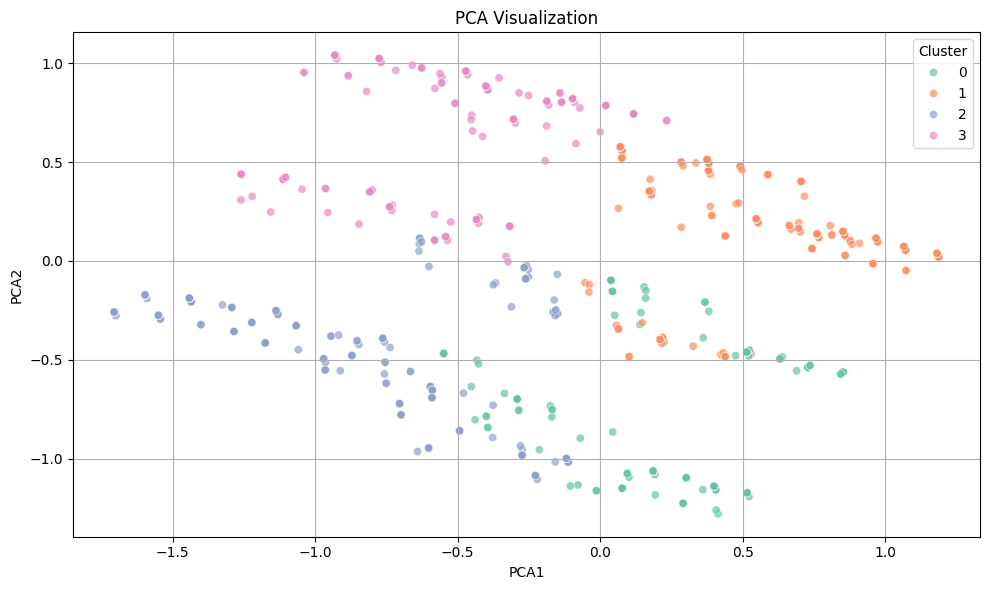

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='PCA1',y='PCA2',hue='Cluster',palette='Set2',alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.tight_layout()
plt.show()

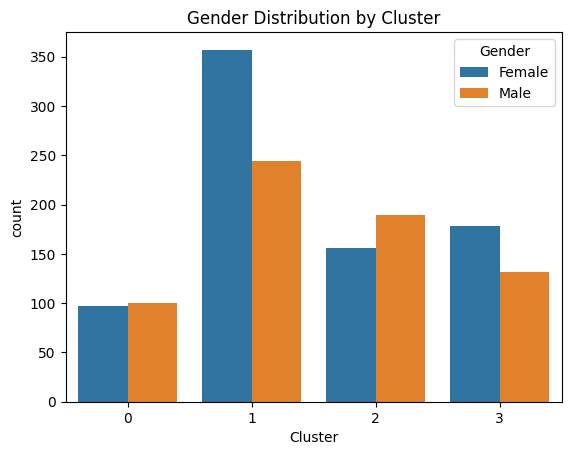

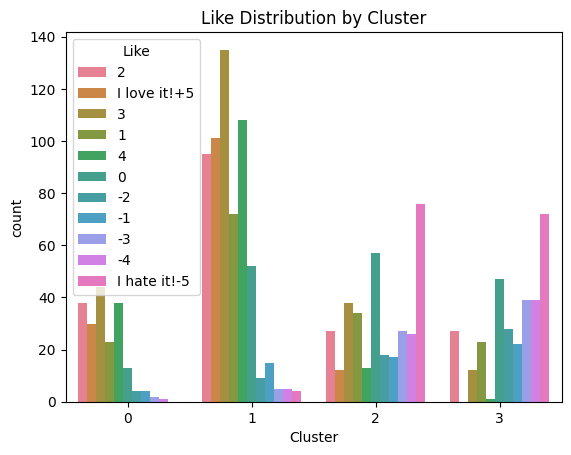

In [30]:
# Mosaic equivalent (stacked bar for each segment)
sns.countplot(data=df, x='Cluster', hue='Gender')
plt.title("Gender Distribution by Cluster")
plt.show()

sns.countplot(data=df, x='Cluster', hue='Like')
plt.title("Like Distribution by Cluster")
plt.show()